## T-SNE analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
atlas_healthy = pd.read_csv('tsne_atlas_healthy.csv')

In [4]:
atlas_healthy_array = atlas_healthy.iloc[:,:-2].to_numpy().flatten()

In [5]:
tissues = atlas_healthy.pop('tissue_name')
cells = atlas_healthy.pop('cell_type')
projects = atlas_healthy.pop('project_id')
assays = atlas_healthy.pop('assay_id')
values = atlas_healthy
values_st =  StandardScaler().fit_transform(values)
n_tissues =len(np.unique(tissues))
n_projects = len(np.unique(projects))
n_cells = len(np.unique(cells))

In [6]:
print(set(cells))

{'Retina', 'Ovary', 'parotid gland', 'Microvessel', 'Lymph node', 'CD4 T-cells', 'Frontal cortex', 'Seminal vesicle', 'B-cells', 'Temporal lobe', 'Small intestine', 'Heart', 'Pancreas', 'Appendix', 'Tooth enamel', 'Colon', 'Anus', 'Monocytes', 'Skin', 'Salivary gland', 'Stomach', 'Uterine cervix', 'Rectum', 'Kidney (single tubules)', 'Ureter', 'Pituitary gland', 'Pancreatic islet', 'Occipital cortex', 'Parietal', 'Placenta', 'Cartilage, chondrocyte', 'Kidney (podocytes)', 'Bone marrow', 'Cerebellum', 'Breast', 'Oviduct', 'Kidney', 'Uterus', 'Spleen', 'Thyroid', 'Kidney (glomeruli)', 'Adipose tissue', 'Prostate', 'Endometrium', 'NK-cells', 'Epidymis', 'Skeletal muscle', 'Liver', 'Duodenum', 'Urinary bladder', 'Bone', 'Adrenal gland', 'Parathyroid gland', 'Brain', 'CD8 T-cell', 'Lung', 'Sclera', 'Smooth muscle', 'Esophagus', 'Trachea', 'Spinal cord', 'Kidney (primary urinary cells)', 'Gall bladder', 'Nasal polyps', 'Substantia Nigra', 'Keratinocytes', 'Tonsil', 'Medulla oblongata', 'Ante

In [7]:
n_tissues =len(np.unique(tissues))
n_projects = len(np.unique(projects))
n_cells = len(np.unique(cells))

In [8]:
print(n_tissues, n_cells)

53 70


In [9]:
palettes = ['Paired', 'Set3', 'Dark2', 'Accent', 'Pastel1', 'Pastel2', 'Spectral']
cell_colors = []
for i in palettes:
    x = sns.color_palette(i)
    l = x.as_hex()
    for ll in l:
        cell_colors.append(ll)
print(len(cell_colors))

63


In [10]:
palettes = ['Paired', 'Set3', 'Dark2', 'Accent', 'Pastel1', 'Pastel2', 'Spectral']
tissue_colors = []
for i in palettes:
    x = sns.color_palette(i)
    l = x.as_hex()
    for ll in l:
        tissue_colors.append(ll)
print(len(tissue_colors))

63


In [11]:
import random
palettes = ['Paired', 'Set3', 'Dark2', 'Accent', 'Pastel1', 'Pastel2', 'Spectral', 'BrBG', 'PuOr', 'RdGy', 'Blues', 'Oranges', 'Purples', 'Reds', 'YlOrBr']
project_colors = []
for i in palettes:
    x = sns.color_palette(i)
    l = x.as_hex()
    for ll in l:
        project_colors.append(ll)
for r in random.sample(project_colors, 82):
    project_colors.append(r)

print(len(project_colors))

193


# Plot TSNE

In [12]:
colordict = {'Medulla oblongata':'dodgerblue',
'Parietal':'skyblue',
'Brain':'blue',
'Cerebellum':'navy',
'Frontal cortex':'deepskyblue',
'Occipital cortex':'deepskyblue',
'Substantia Nigra':'royalblue',
'Temporal lobe':'steelblue',
'Spinal cord':'c',
'Bone':'lime',
'Bone marrow':'limegreen',
'Cartilage, chondrocyte':'greenyellow',
'CD4 T-cells':'olive',
'CD8 T-cell': 'darkolivegreen',
'B-cells': 'olivedrab',
'Monocytes':'y',
'NK-cells':'yellowgreen',
'Anterior chamber of the eye':'darkviolet',
'Retina':'darkorchid',
'Sclera':'m',
'Ovary':'orangered',
'Oviduct':'tomato',
'Placenta':'lightcoral',
'Uterine cervix':'red',
'Uterus':'firebrick',
'Endometrium':'crimson',
'Kidney':'orange',
'Kidney (glomeruli)':'darkorange',
'Kidney (podocytes)':'navajowhite',
'Kidney (primary urinary cells)':'peachpuff',
'Kidney (single tubules)':'sandybrown',
'Pancreas':'deeppink',
'Pancreatic islet':'fuchsia',
'Epidymis':'indianred',
'Prostate':'maroon',
'Seminal vesicle':'lightsalmon',
'Testis':'lightcoral',
'Ureter':'sienna',
'Urinary bladder':'chocolate',
'Heart':'turquoise',
'Skeletal muscle':'cyan',
'Smooth muscle':'aqua',
'Keratinocytes':'goldenrod',
'Skin':'gold',
'Adipose tissue':'yellow',
'Adrenal gland':'bisque',
'Anus':'mediumpurple',
'Colon':'rebeccapurple',
'Duodenum':'slateblue',
'Esophagus':'blueviolet',
'Rectum':'mediumorchid',
'Small intestine':'darkmagenta',
'Stomach':'indigo',
'Trachea':'darkslateblue',
'Appendix':'gainsboro',
'Spleen':'dimgrey',
'Breast':'moccasin',
'Gall bladder':'darkgrey',
'Liver':'lightpink',
'Lung':'paleturquoise',
'Lymph node':'mediumspringgreen',
'Microvessel':'palegreen',
'Nasal polyps':'mintcream',
'Parathyroid gland':'silver',
'Pituitary gland':'antiquewhite',
'Salivary gland':'palegoldenrod',
'Thyroid':'khaki',
'Tonsil':'slategray',
'Tooth enamel':'rosybrown',
'parotid gland':'k'}

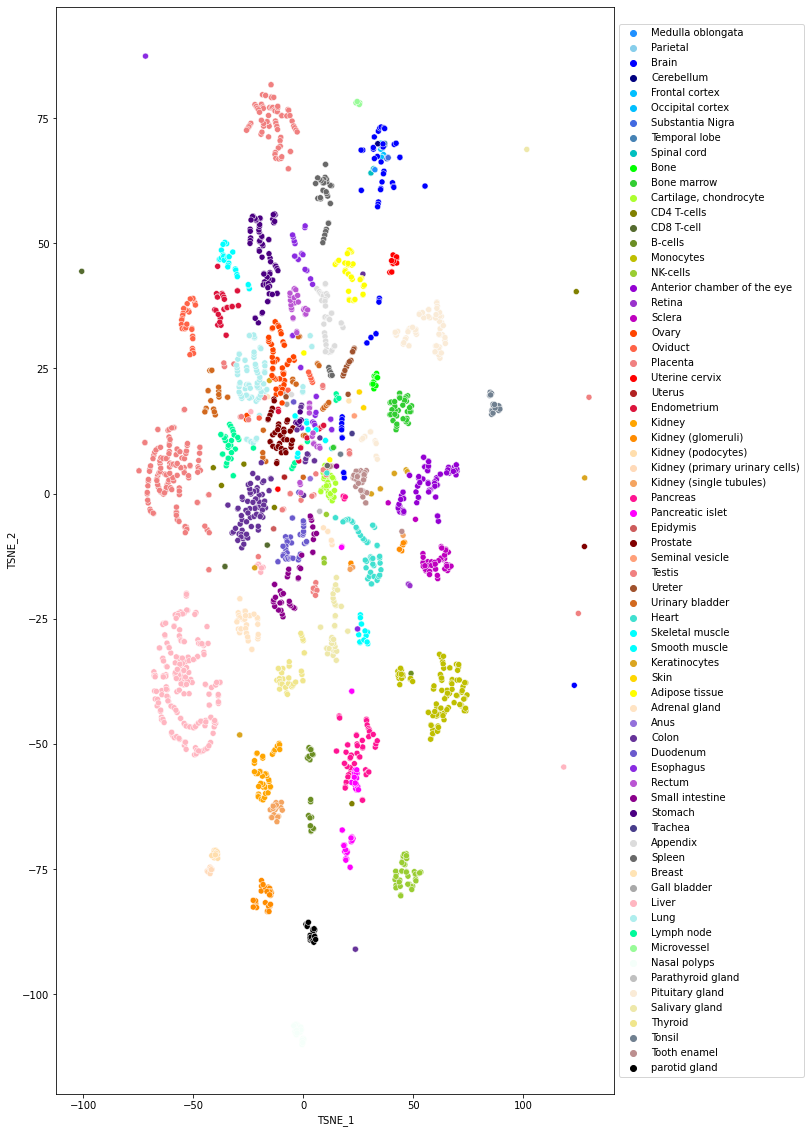

In [13]:
tsne = TSNE(perplexity=15)
principalComponents = tsne.fit_transform(values_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['TSNE_1', 'TSNE_2'])
finalDf = pd.concat([principalDf, tissues, cells, projects, assays], axis = 1)
fig, ax=plt.subplots(figsize=(10,20))
g = sns.scatterplot(data=finalDf, x='TSNE_1', y='TSNE_2', hue='cell_type', palette=colordict, hue_order = colordict.keys())
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Plot per tissue and colour per project

/home/compomics/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/compomics/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/compomics/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warnin

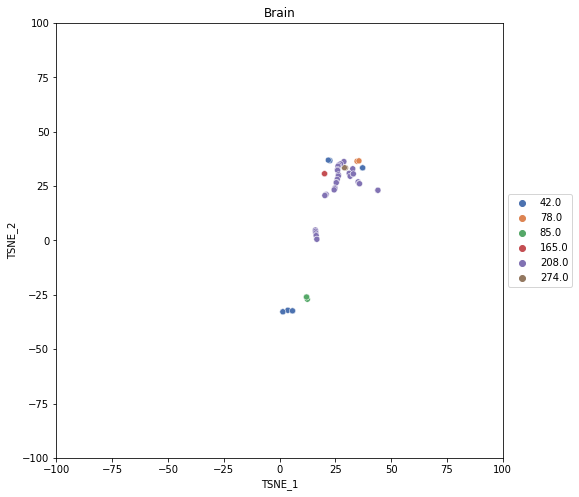

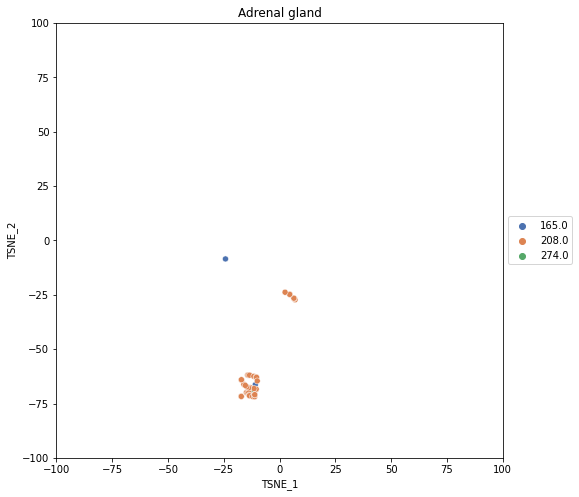

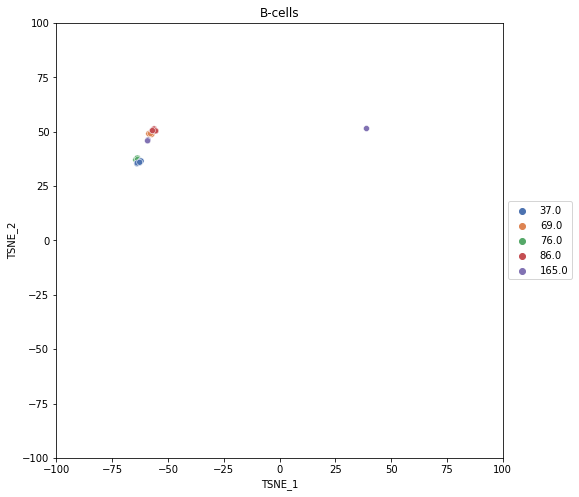

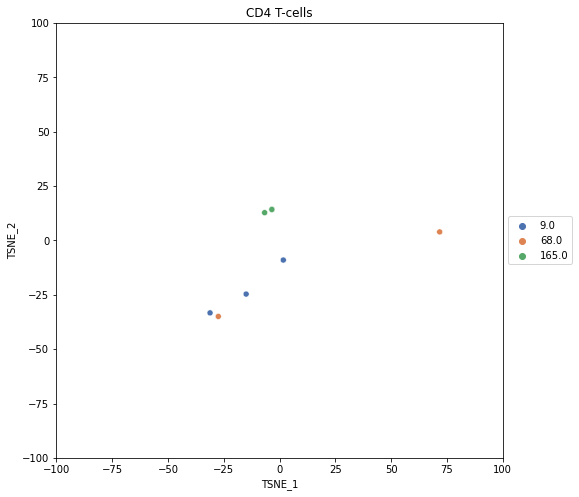

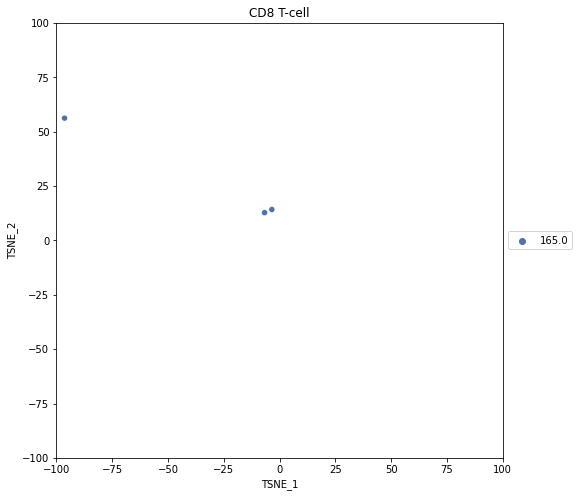

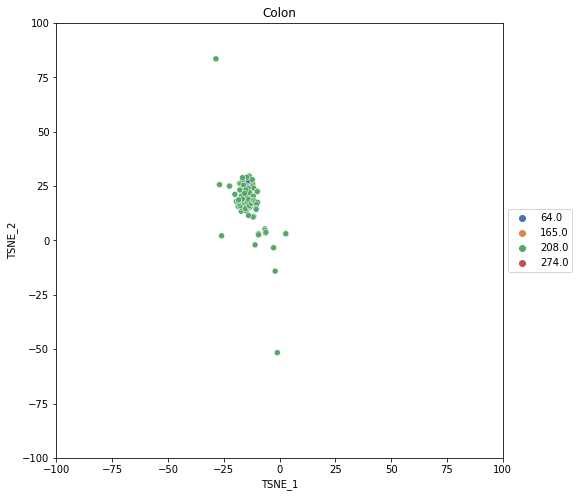

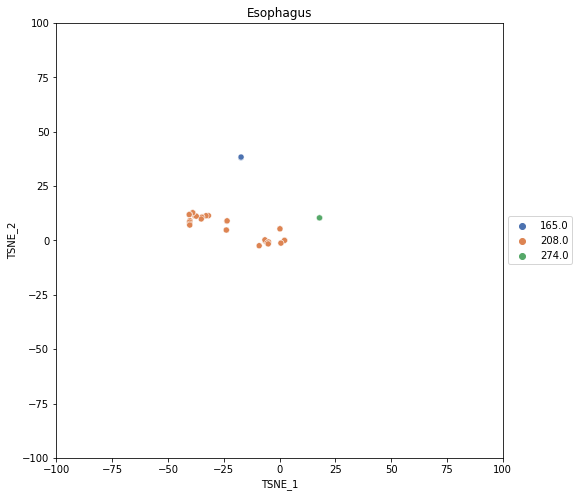

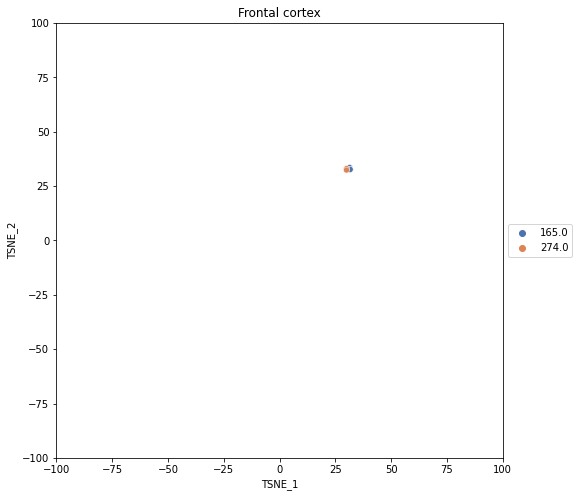

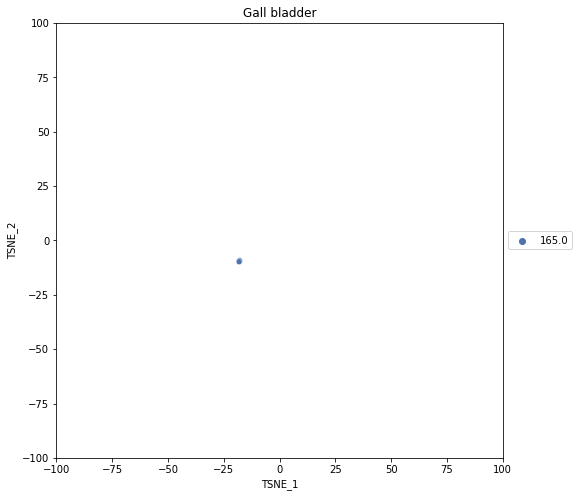

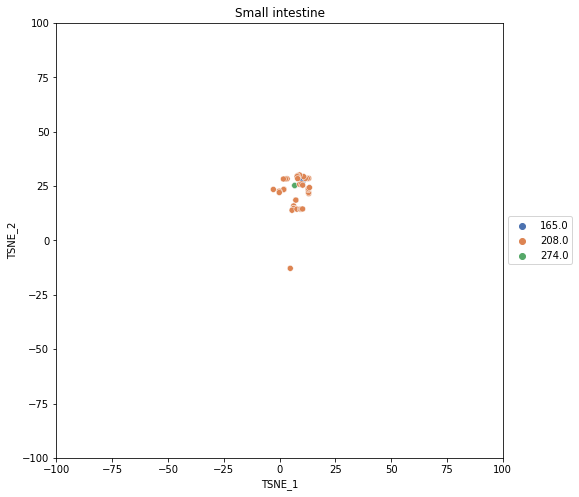

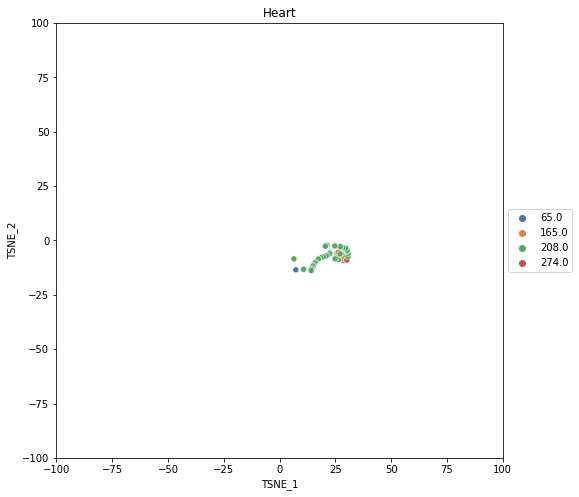

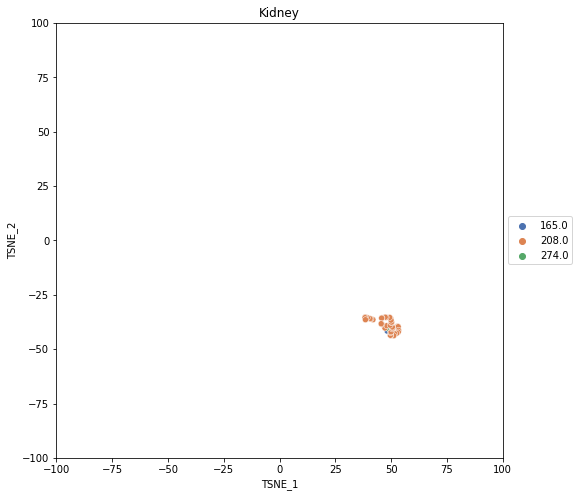

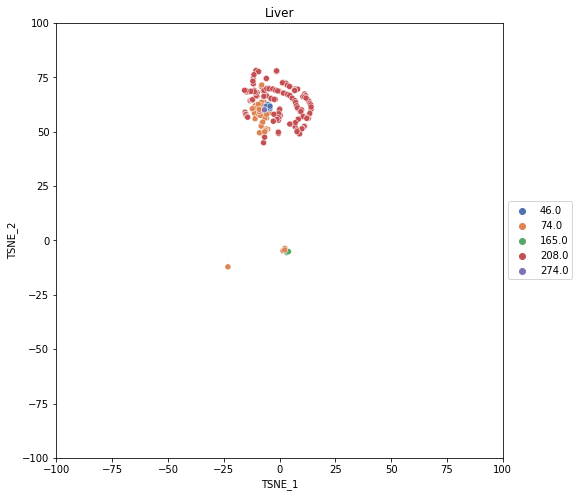

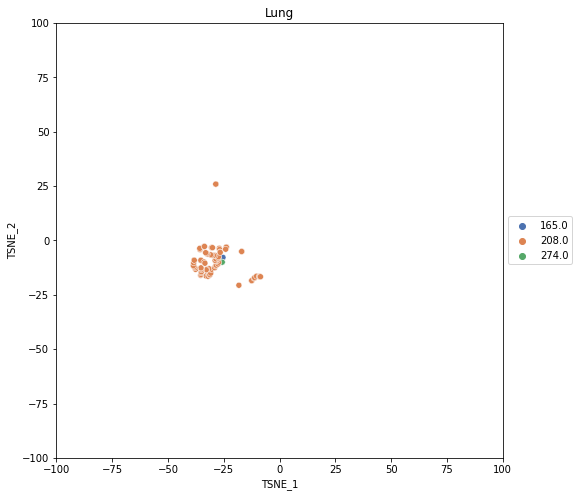

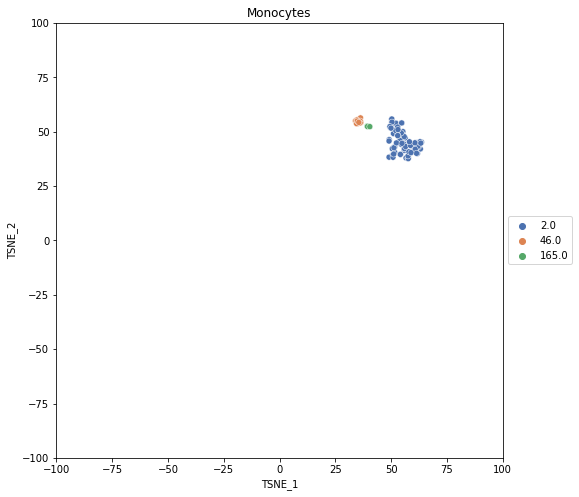

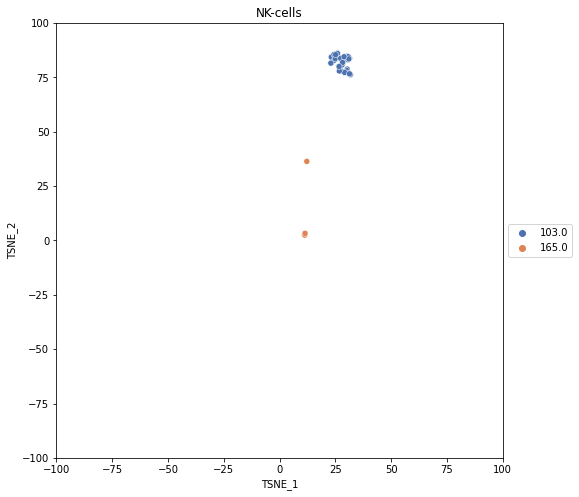

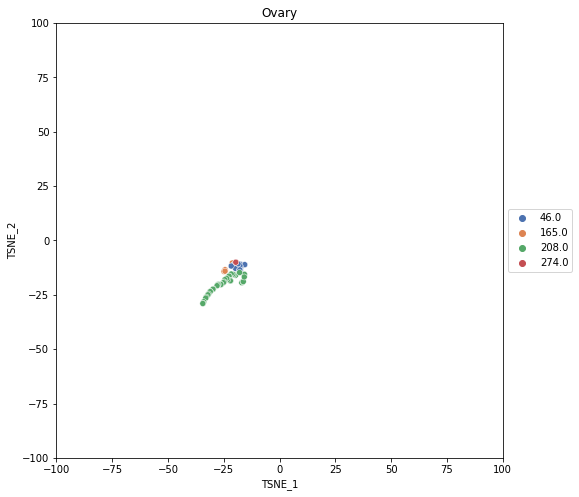

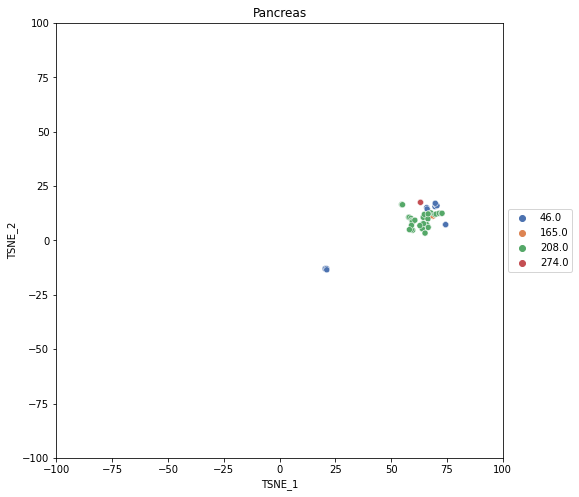

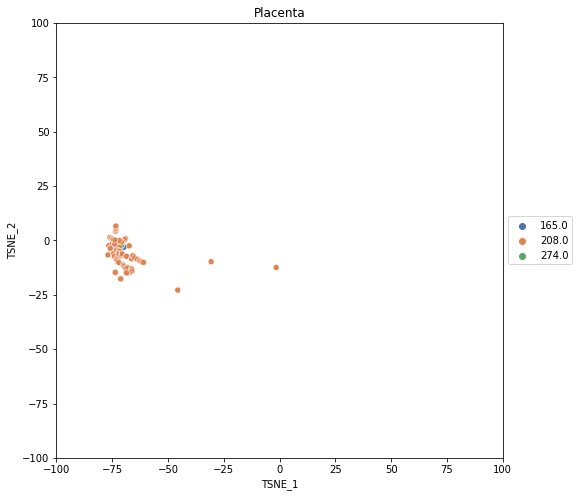

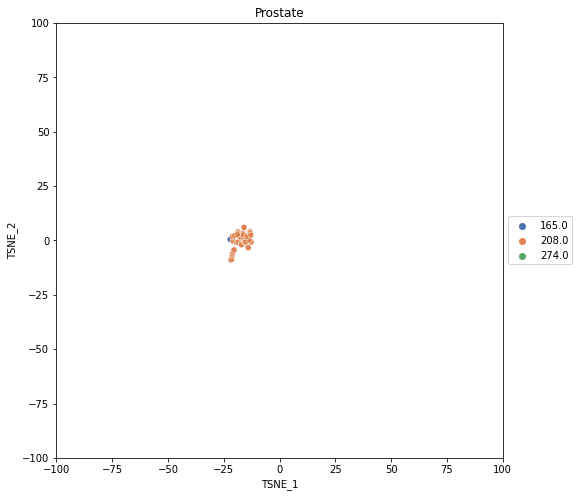

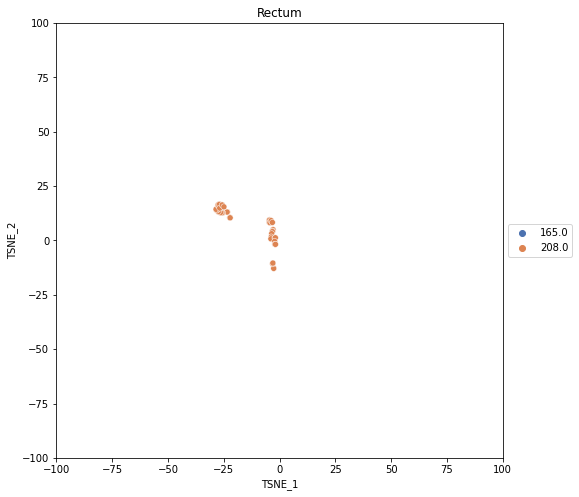

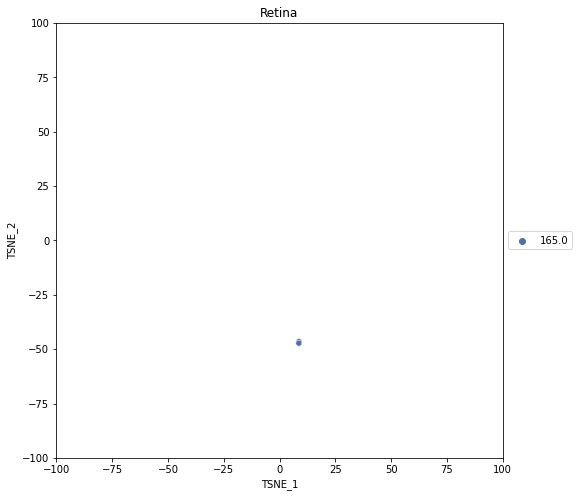

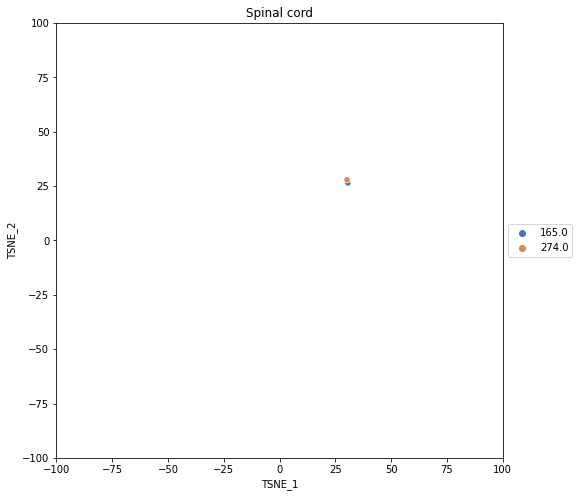

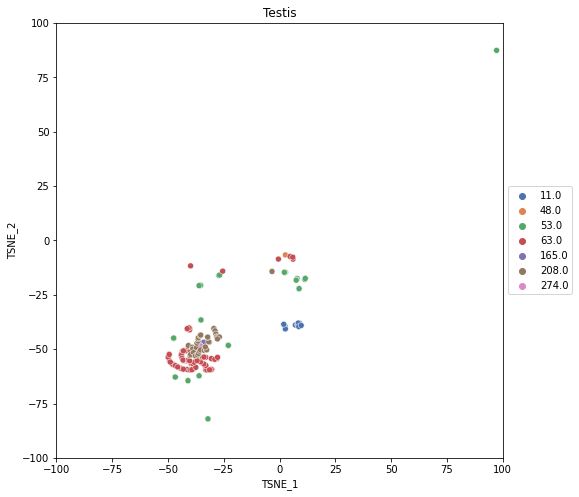

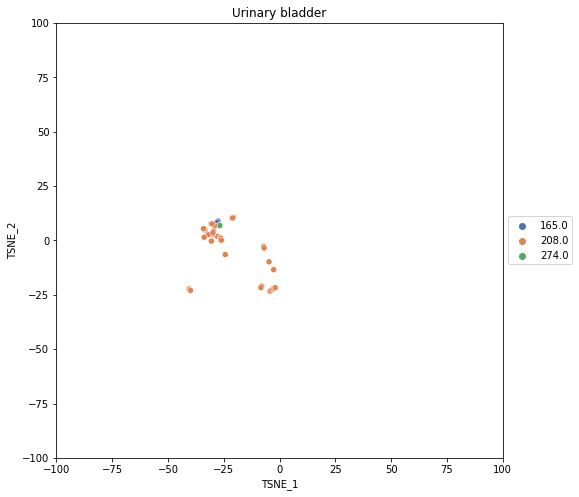

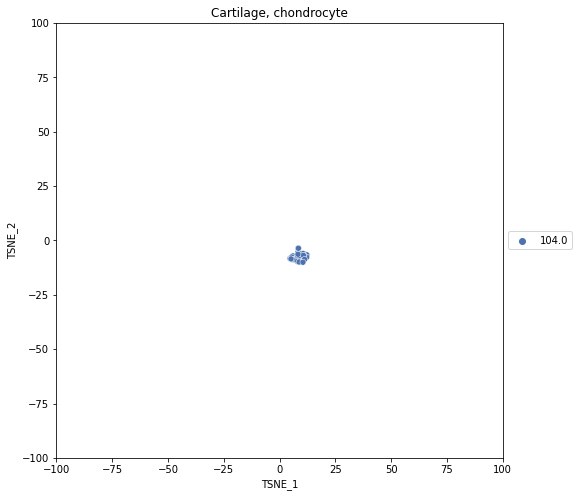

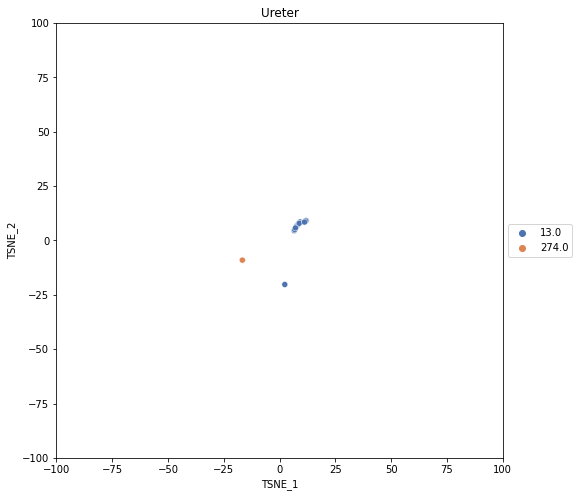

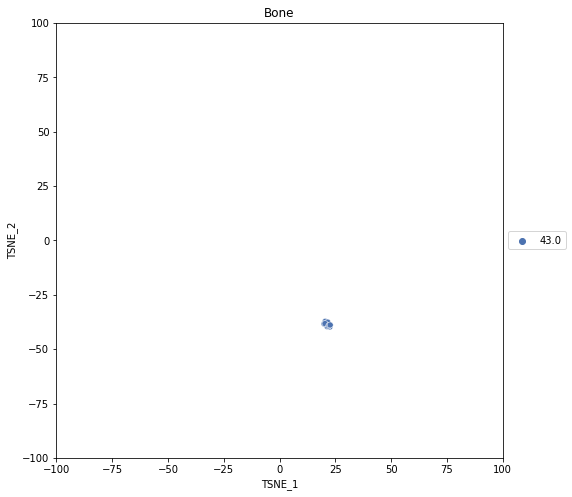

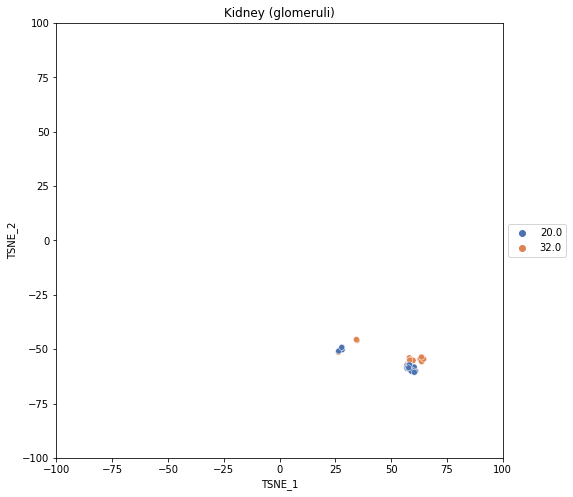

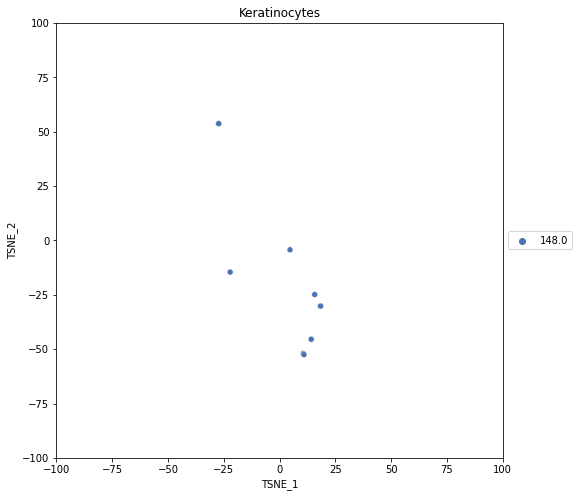

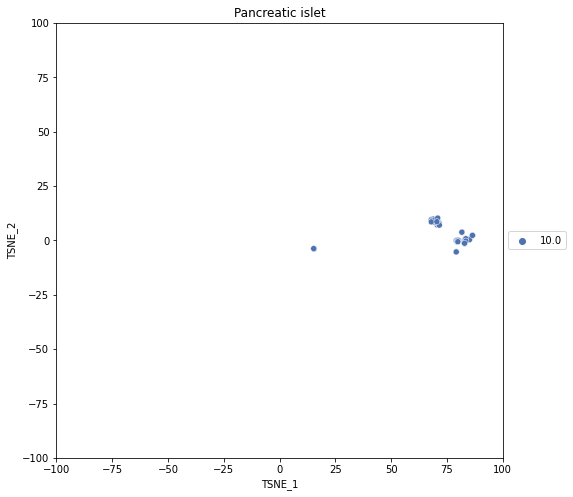

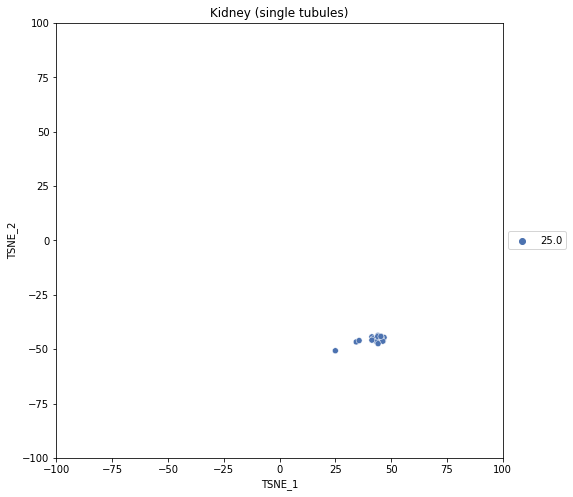

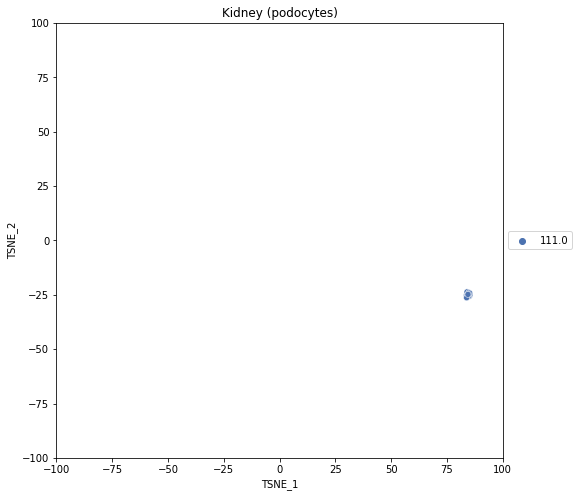

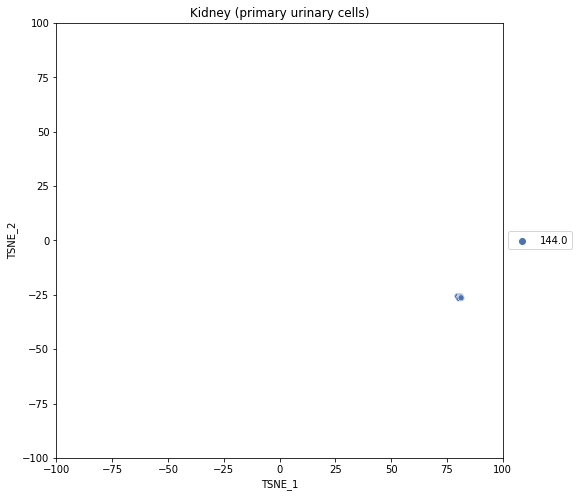

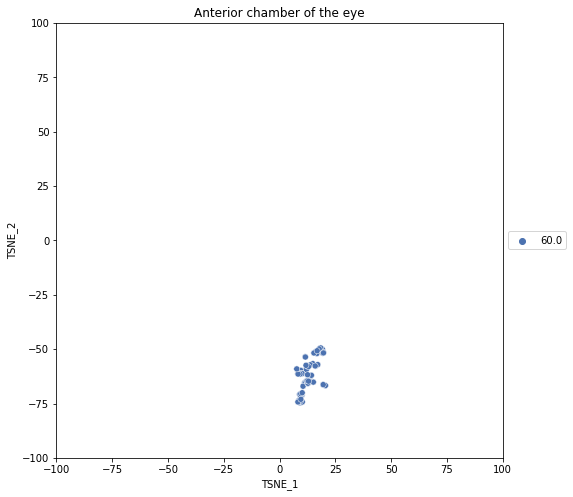

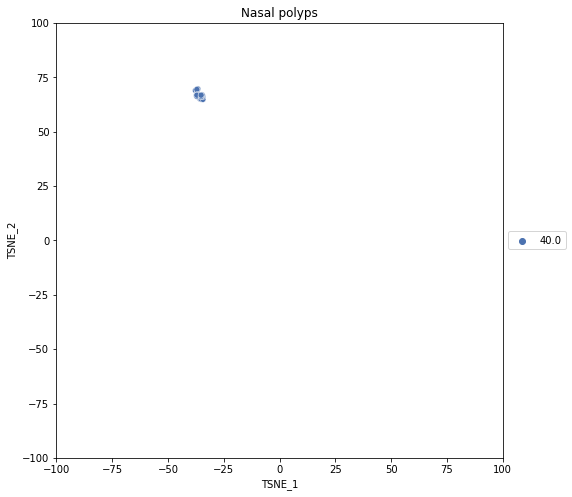

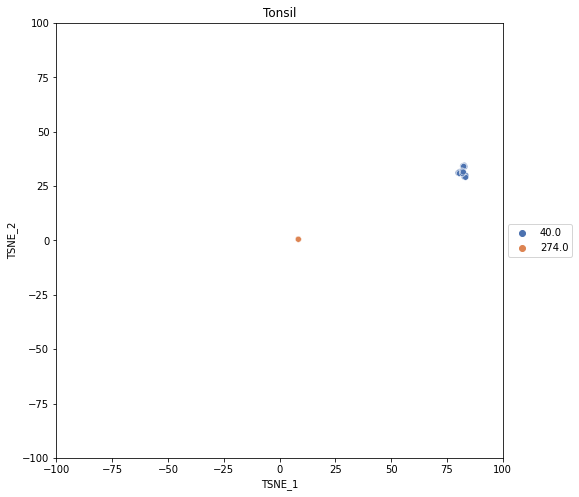

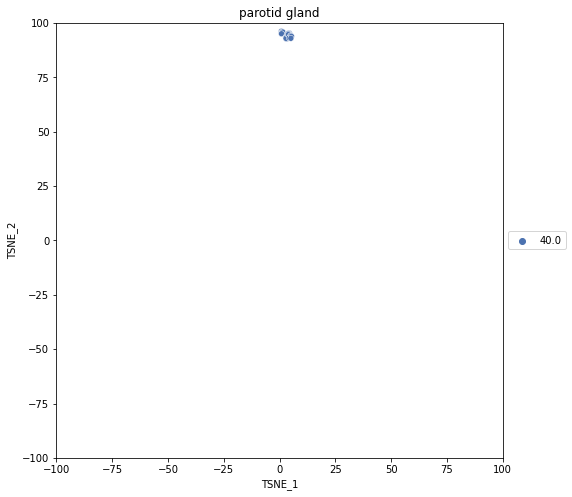

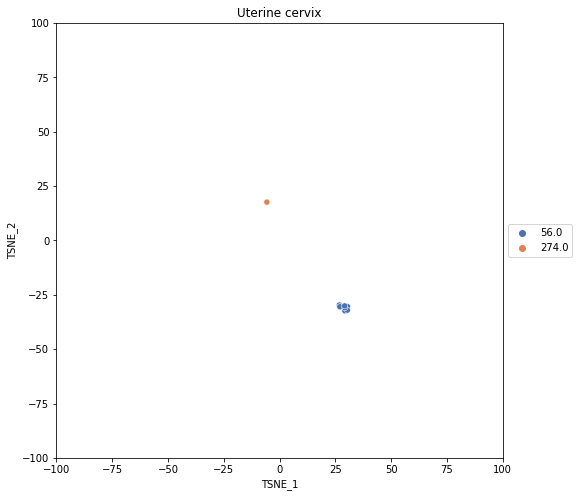

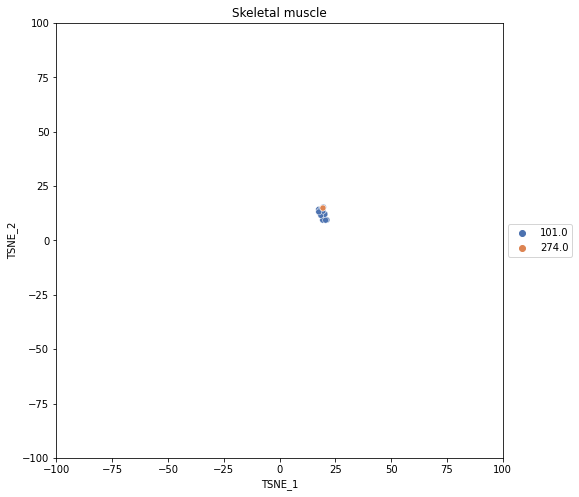

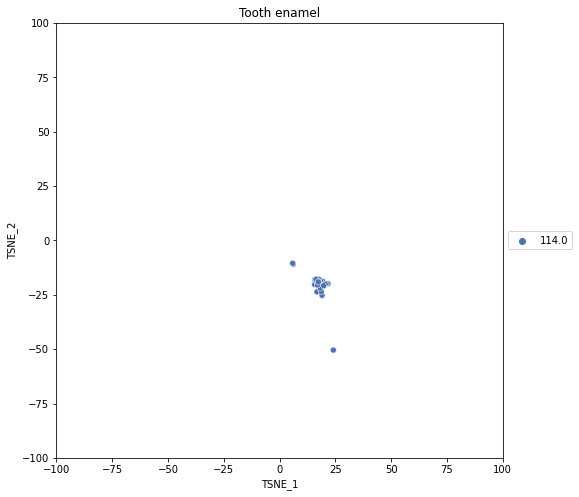

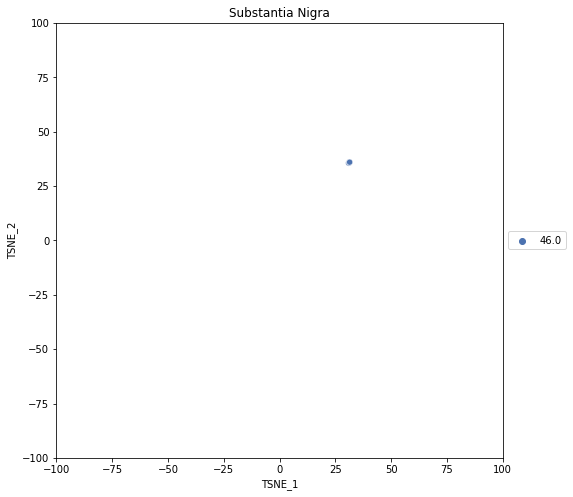

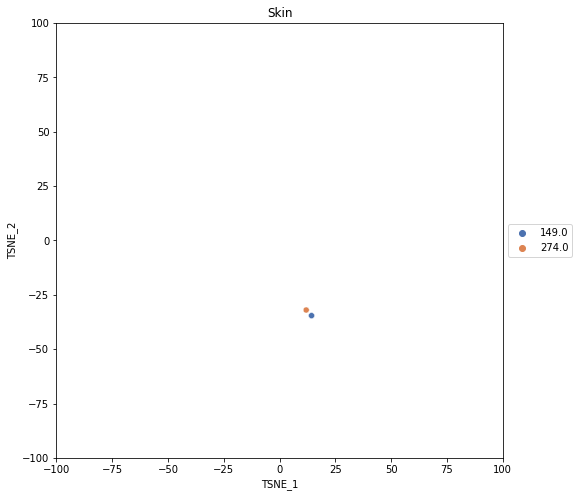

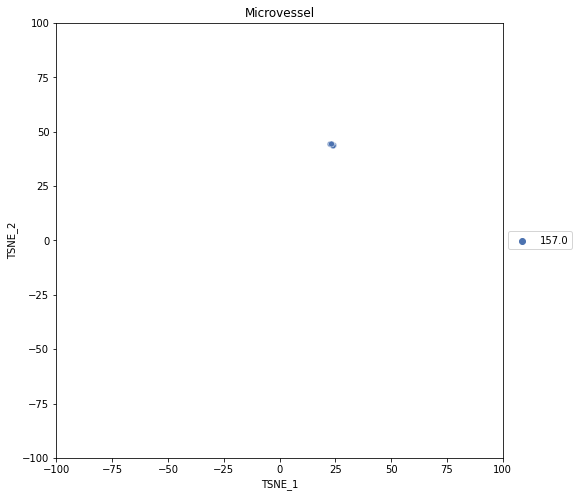

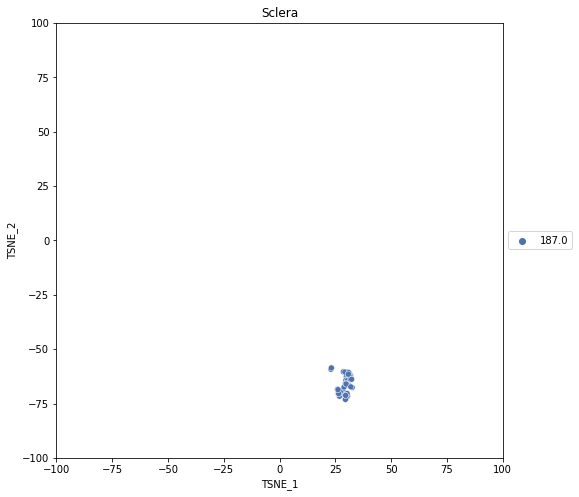

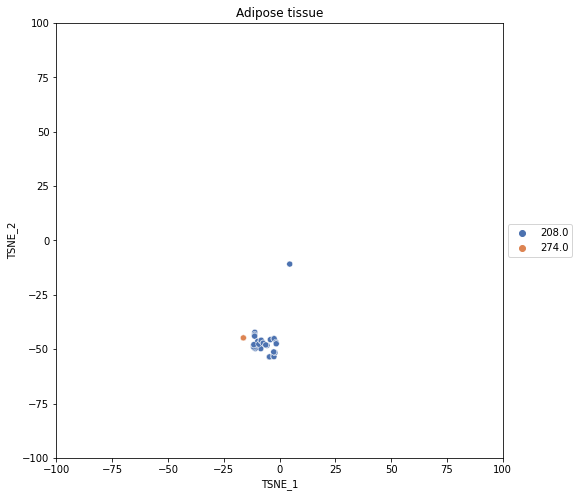

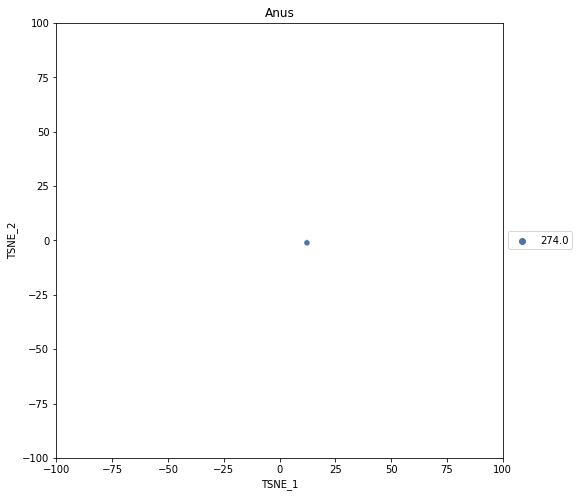

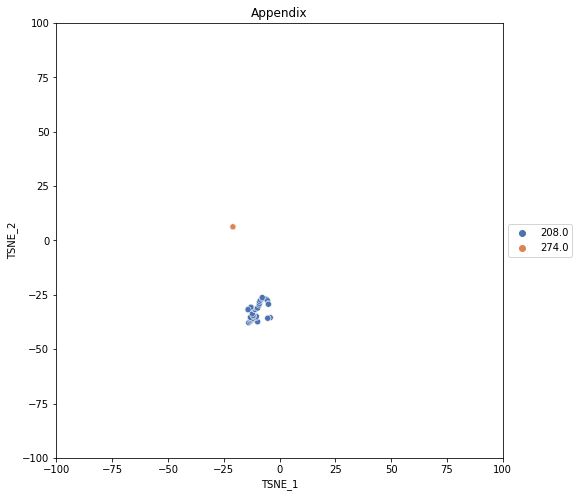

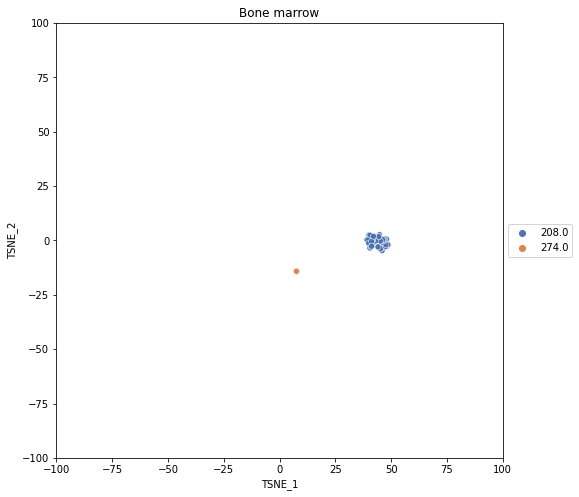

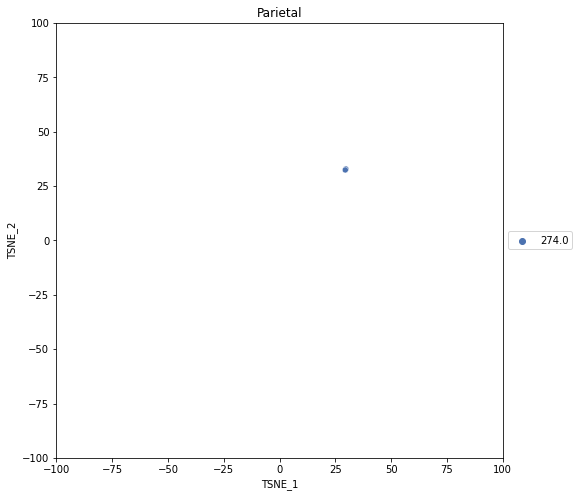

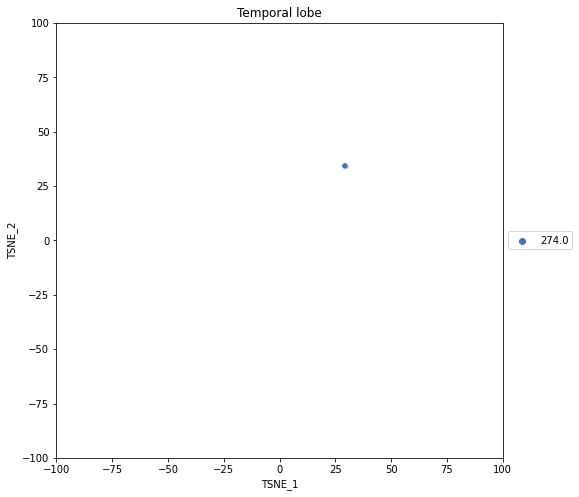

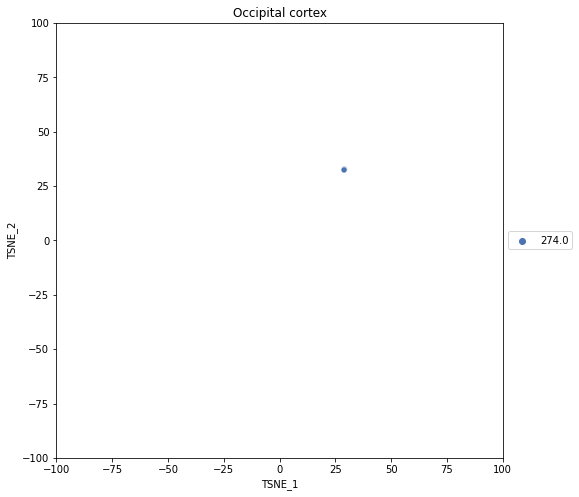

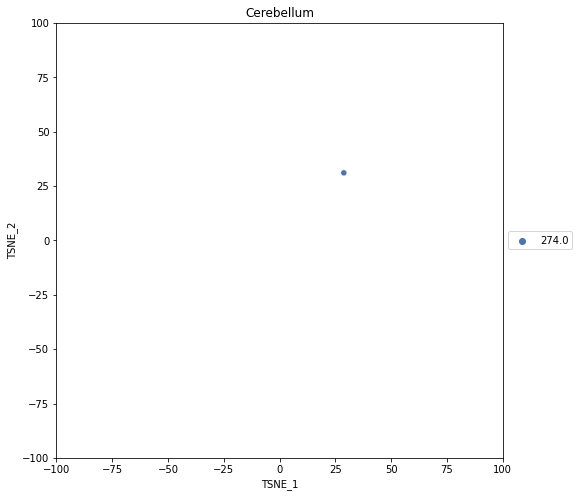

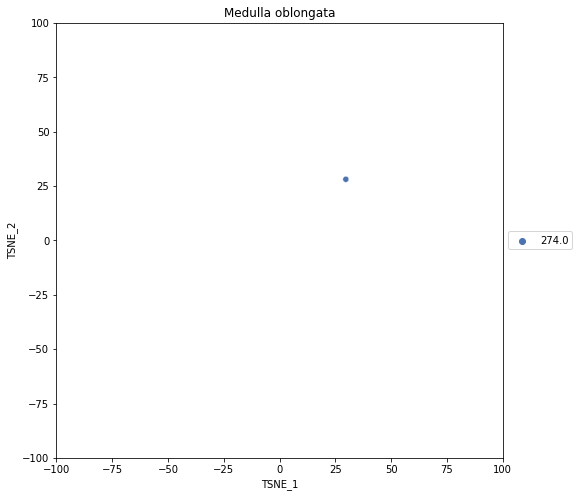

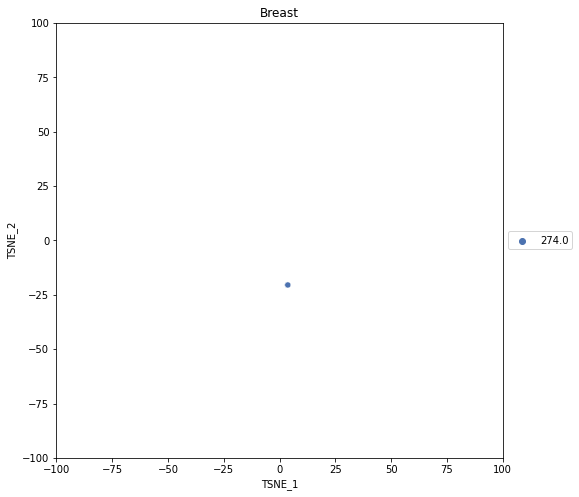

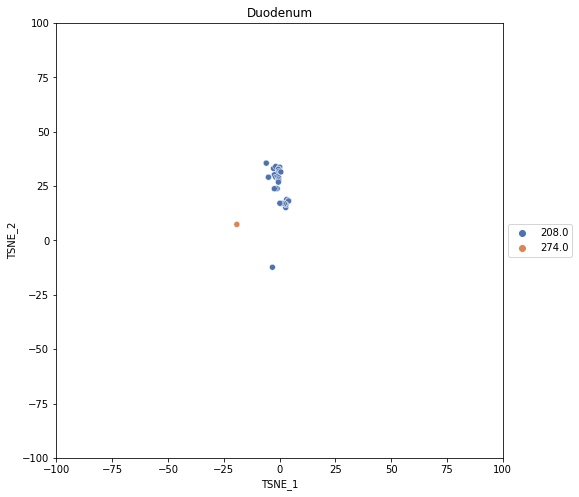

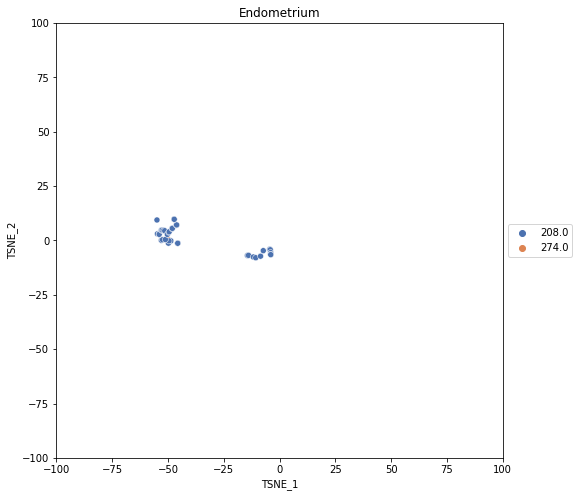

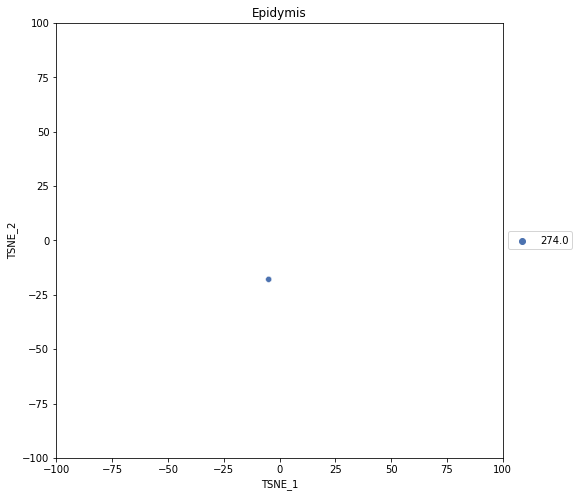

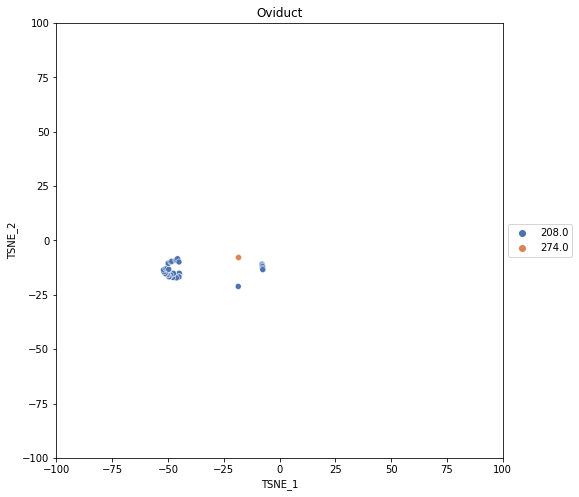

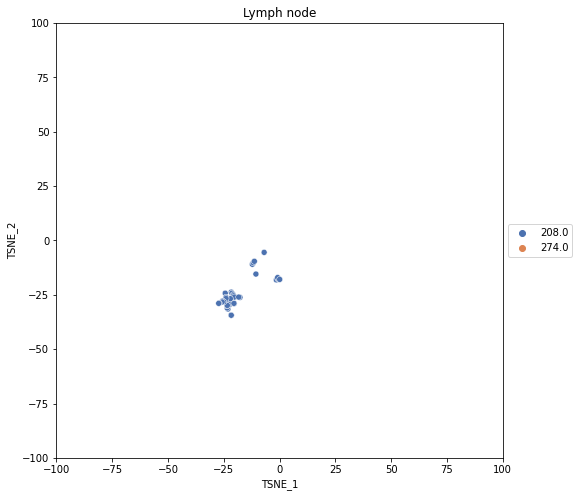

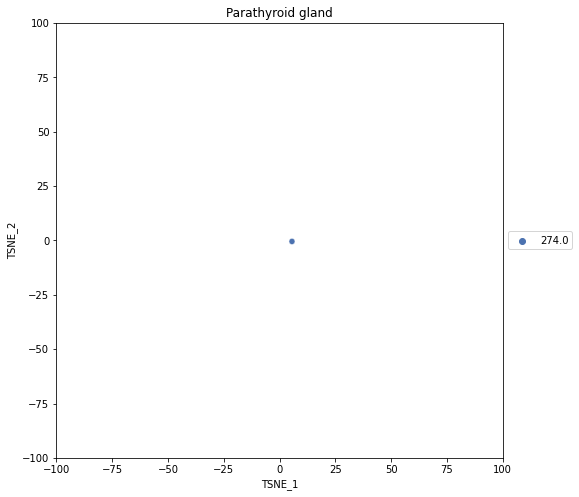

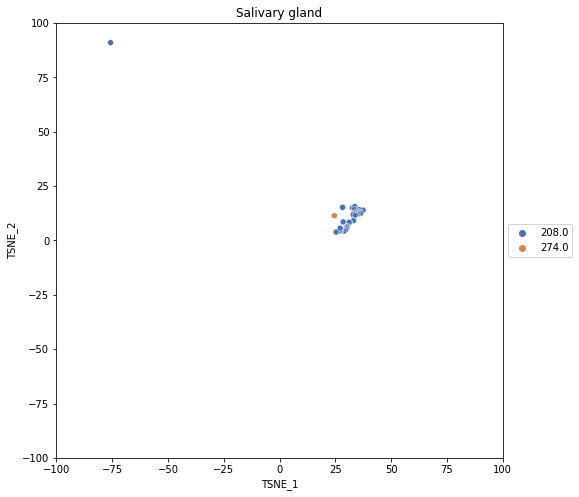

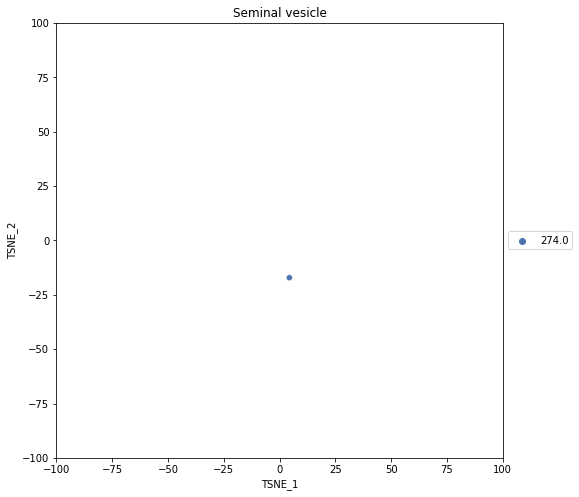

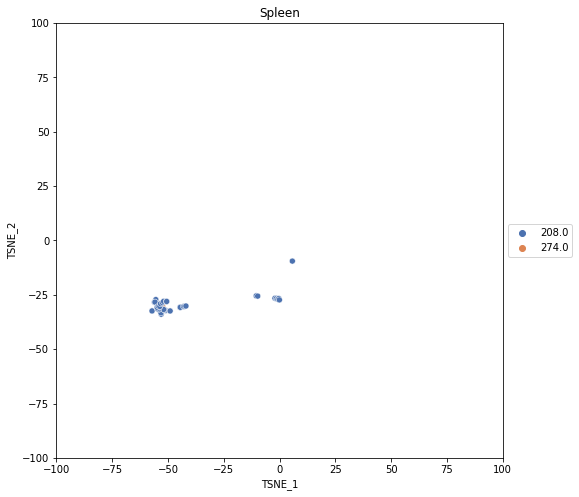

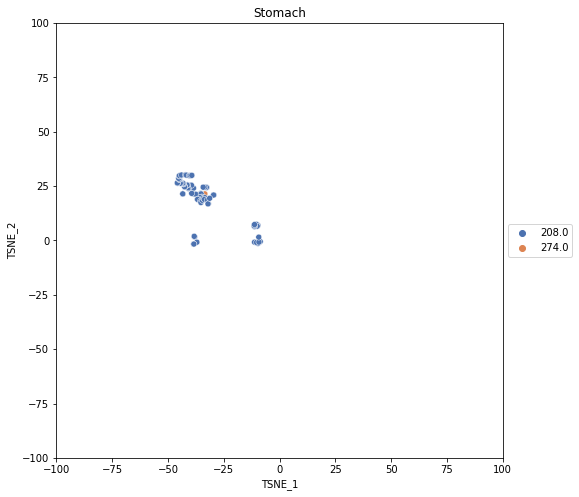

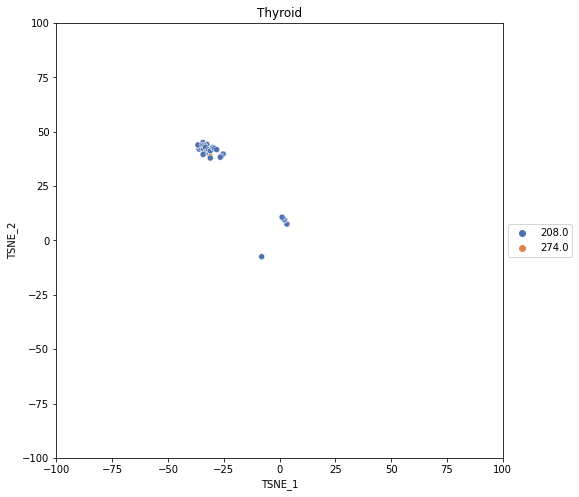

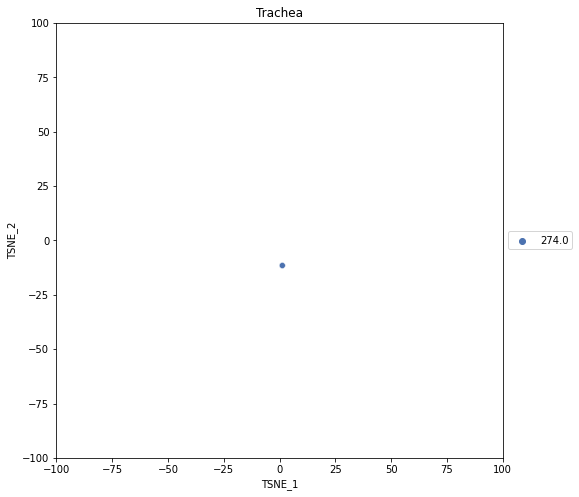

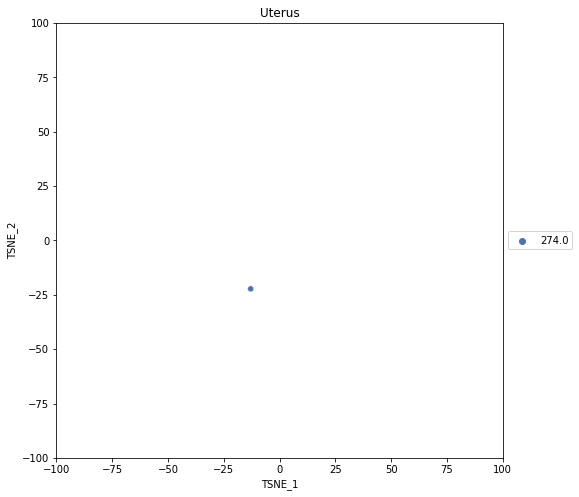

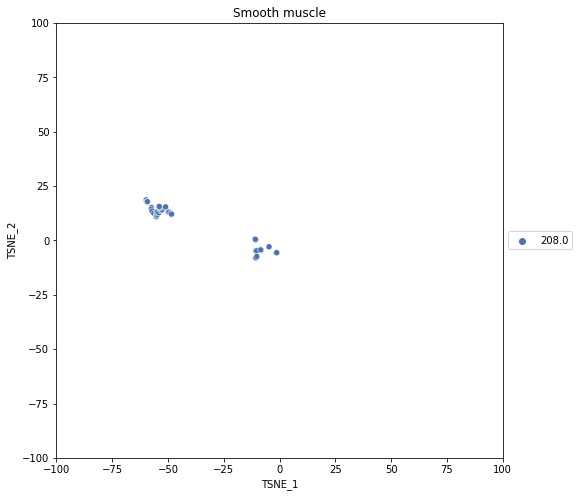

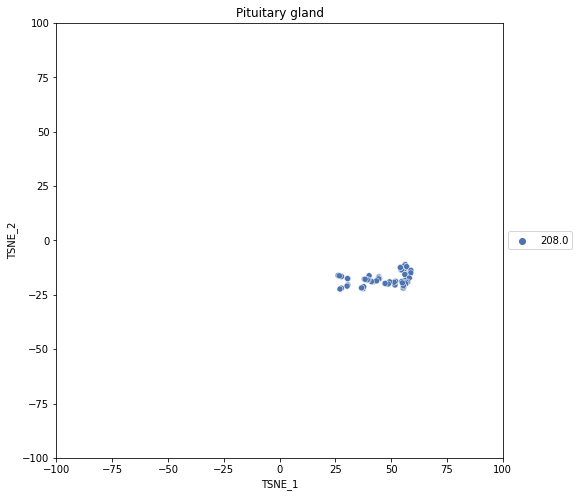

In [17]:
import random
for tissue in finalDf['cell_type'].unique().tolist():
    finalDf_onetissue = finalDf.loc[finalDf['cell_type'] == tissue]
    count = len(finalDf_onetissue['project_id'].unique()) - 1
    fig, ax=plt.subplots(figsize=(8,8))
    pal = sns.color_palette("Spectral", n_colors=count)
    g = sns.scatterplot(data=finalDf_onetissue, x='TSNE_1', y='TSNE_2', hue='project_id', palette= "deep",ax=ax)    
    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)

    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    g.set_title(tissue)
    g.figure.savefig('TSNE_scatterplots/cell_level/{} TSNE_assay_c.png'.format(tissue), bbox_inches='tight')